In [1]:
from src.test_non_local_switching_non_stationary_model import load_data

is_ripple, spikes, position, speed, env, time = load_data(work_computer=False)


In [2]:
from src.test_non_local_switching_non_stationary_model import (
    setup_nonlocal_switching_model,
)

(
    emission_design_matrix,
    emission_predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    discrete_transition_coefficients,
    discrete_transition_design_matrix,
    continuous_state_transitions,
    state_ind,
    zero_rates,
    is_training,
    state_names,
) = setup_nonlocal_switching_model(
    is_ripple,
    spikes,
    position,
    speed,
    env,
    no_spike_rate_threshold=0.01,
    is_stationary_discrete_transition=True,
    include_no_spike_state=True,
)


In [3]:
import numpy as np


log_likelihood = np.load("log_likelihood_fragmented.npy")

Text(0.5, 1.0, 'Discrete State Transition')

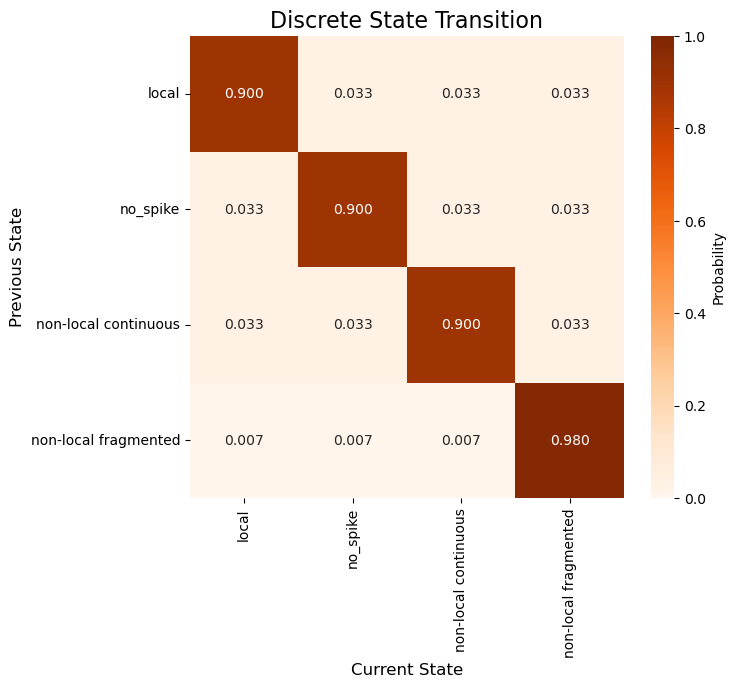

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

vmin, vmax, fmt = 0.0, 1.0, "0.03f"
label = "Probability"
cmap = "Oranges"

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(
    data=discrete_state_transitions,
    vmin=vmin,
    vmax=vmax,
    annot=True,
    fmt=fmt,
    cmap=cmap,
    xticklabels=state_names,
    yticklabels=state_names,
    ax=ax,
    cbar_kws={"label": label},
)
ax.set_ylabel("Previous State", fontsize=12)
ax.set_xlabel("Current State", fontsize=12)
ax.set_title("Discrete State Transition", fontsize=16)

In [5]:
discrete_state_transitions.sum(axis=1)

array([1., 1., 1., 1.])

In [6]:
stickiness = np.array([30.0, 100_000.0, 45.0, 200.0])[:, np.newaxis]

blah = np.ones((4, 4)) * 1.1 + np.eye(4) * stickiness

blah / blah.sum(axis=1, keepdims=True)

array([[9.04069767e-01, 3.19767442e-02, 3.19767442e-02, 3.19767442e-02],
       [1.09995160e-05, 9.99967001e-01, 1.09995160e-05, 1.09995160e-05],
       [2.22672065e-02, 2.22672065e-02, 9.33198381e-01, 2.22672065e-02],
       [5.38160470e-03, 5.38160470e-03, 5.38160470e-03, 9.83855186e-01]])

In [7]:
from src.test_non_local_switching_non_stationary_model import fit_switching_model
import numpy as np

stickiness = np.array([30.0, 100_000.0, 30.0, 200.0])[:, np.newaxis]

(
    predicted_state,
    acausal_posterior,
    acausal_state_probabilities,
    causal_posterior,
    marginal_log_likelihoods,
    initial_conditions,
    discrete_state_transitions,
    discrete_transition_coefficients,
    discrete_transition_design_matrix,
    non_local_rates,
    log_likelihood,
) = fit_switching_model(
    spikes,
    emission_design_matrix,
    emission_predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    continuous_state_transitions,
    state_ind,
    zero_rates,
    is_training,
    env,
    discrete_transition_coefficients=discrete_transition_coefficients,
    discrete_transition_design_matrix=discrete_transition_design_matrix,
    max_iter=20,
    fit_inital_conditions=False,
    fit_discrete_transition=True,
    fit_likelihood=False,
    concentration=1.1,
    stickiness=stickiness,
    log_likelihood=log_likelihood,
)


[[0.9        0.03333333 0.03333333 0.03333333]
 [0.03333333 0.9        0.03333333 0.03333333]
 [0.03333333 0.03333333 0.9        0.03333333]
 [0.00666667 0.00666667 0.00666667 0.98      ]]
Likelihoods
Expectation Step
Maximization Step
Stats
iteration 1, likelihood: -1924151.1006073751
[[0.94837635 0.02025467 0.02833893 0.00303004]
 [0.03850751 0.94871259 0.01100126 0.00177864]
 [0.03181779 0.01108156 0.95227545 0.00482519]
 [0.03990369 0.0144347  0.03644587 0.90921573]]
Likelihoods
Expectation Step
Maximization Step
Stats
iteration 2, likelihood: -1906758.9984595769, change: 17392.102147798287
[[9.55551663e-01 1.60104973e-02 2.76498171e-02 7.88022350e-04]
 [3.37917542e-02 9.62981799e-01 3.00387108e-03 2.22575276e-04]
 [2.58722381e-02 3.66491192e-03 9.68330065e-01 2.13278451e-03]
 [6.45919475e-02 1.13022147e-02 6.34494689e-02 8.60656369e-01]]
Likelihoods
Expectation Step
Maximization Step
Stats
iteration 3, likelihood: -1905172.9897623565, change: 1586.0086972203571
[[9.57697553e-01 1.

In [8]:
non_local_rates = np.load("non_local_rates.npy")

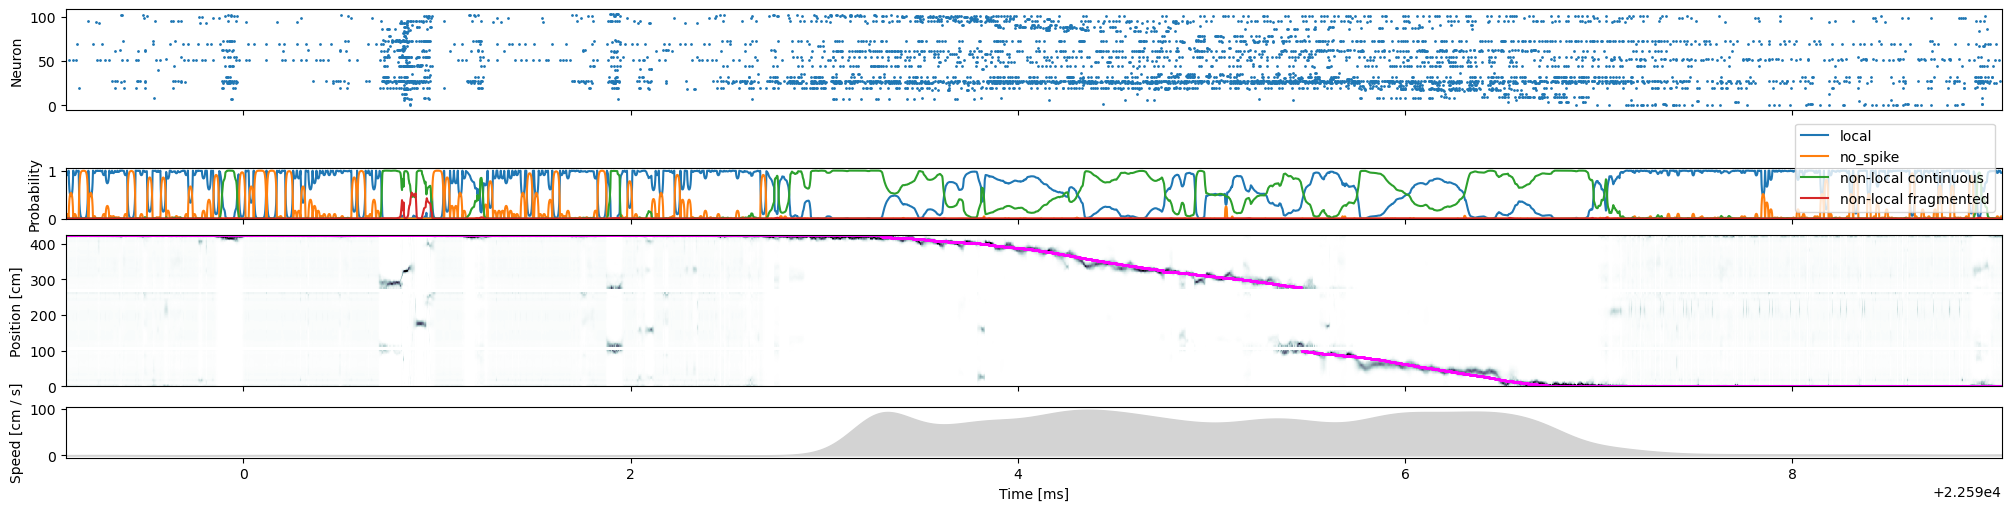

In [9]:
from src.test_non_local_switching_non_stationary_model import plot_switching_model


plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(100_000, 105_000),
)


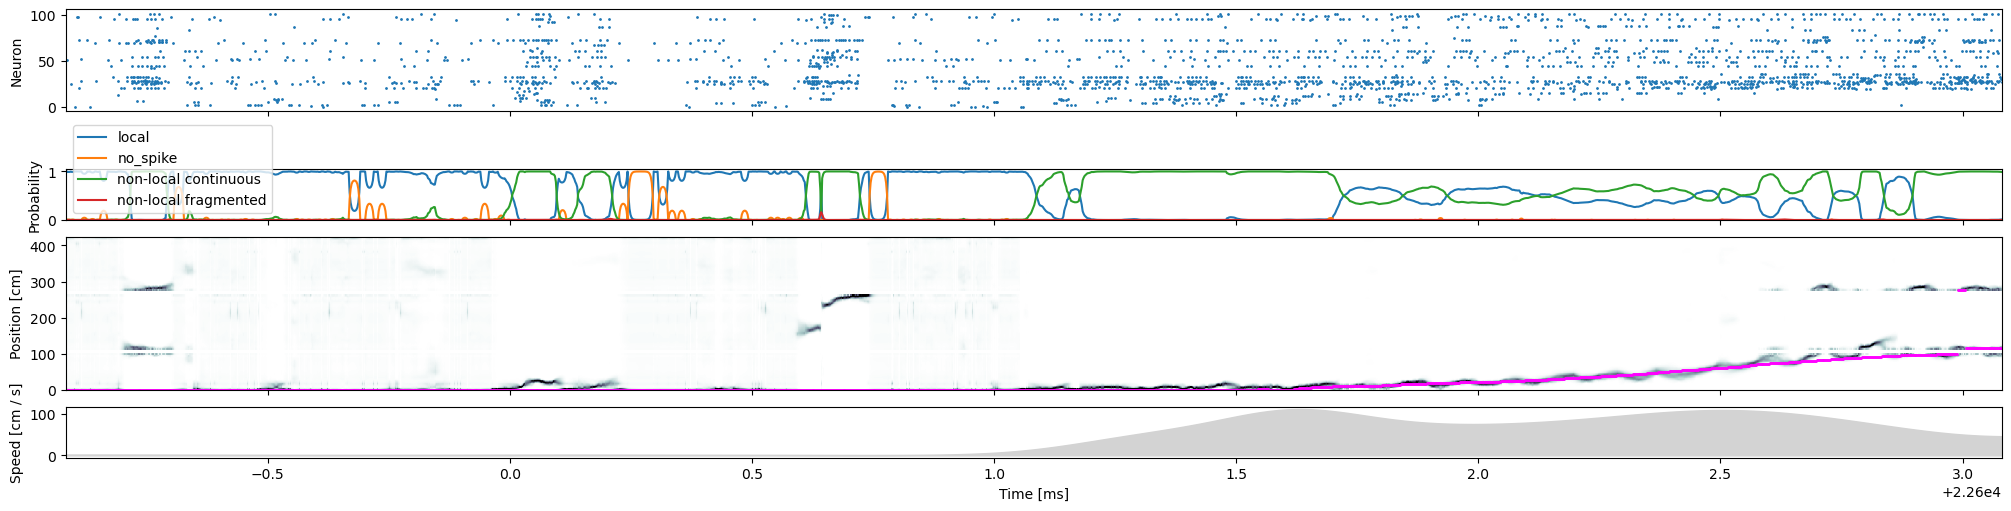

In [10]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(105_000, 107_000),
)


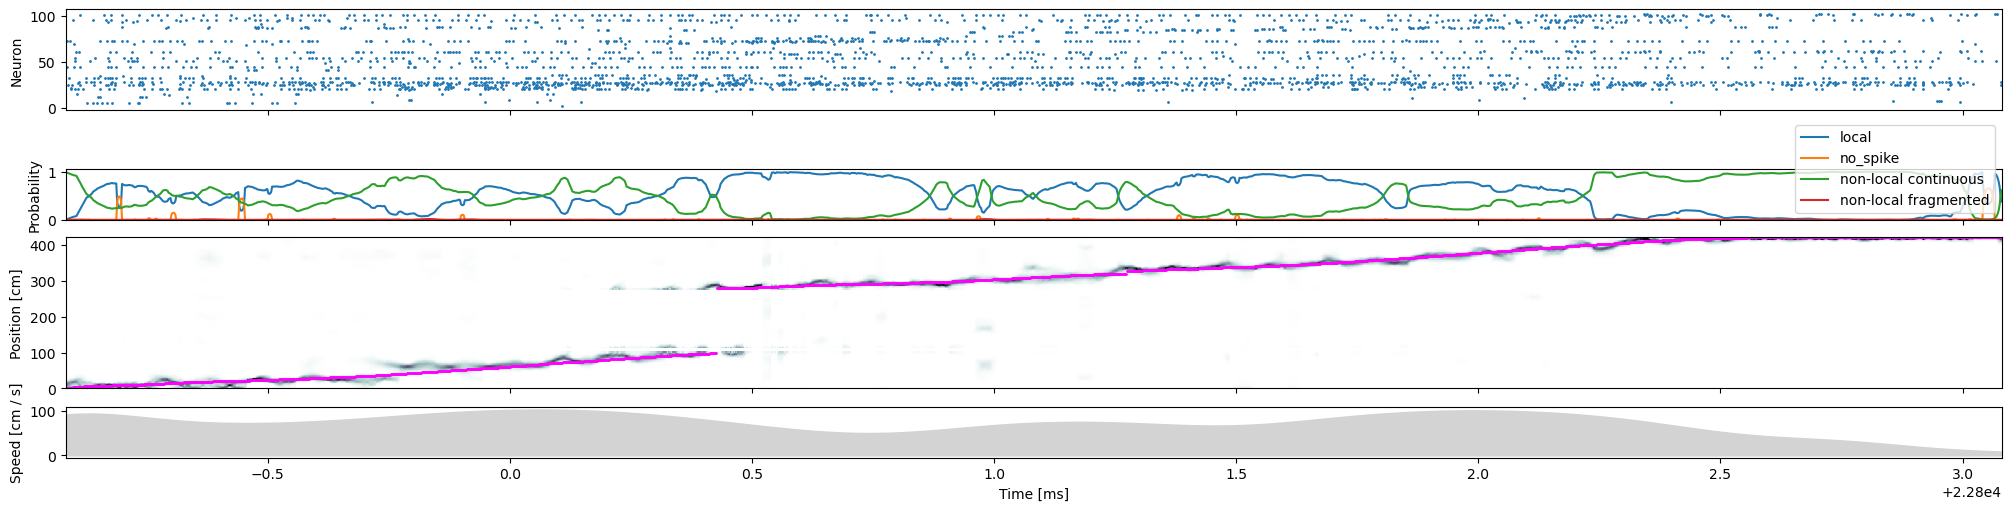

In [11]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(205_000, 207_000),
)


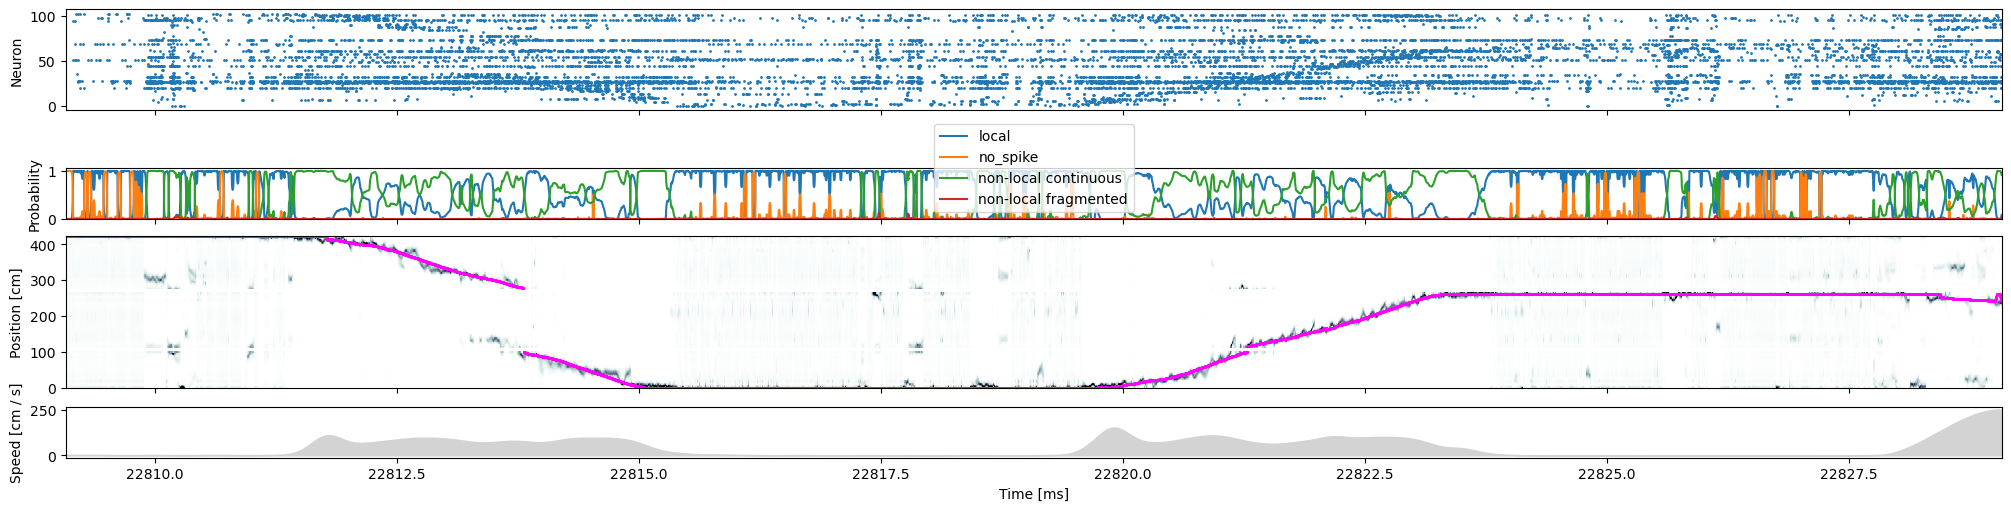

In [12]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(210_000, 220_000),
)


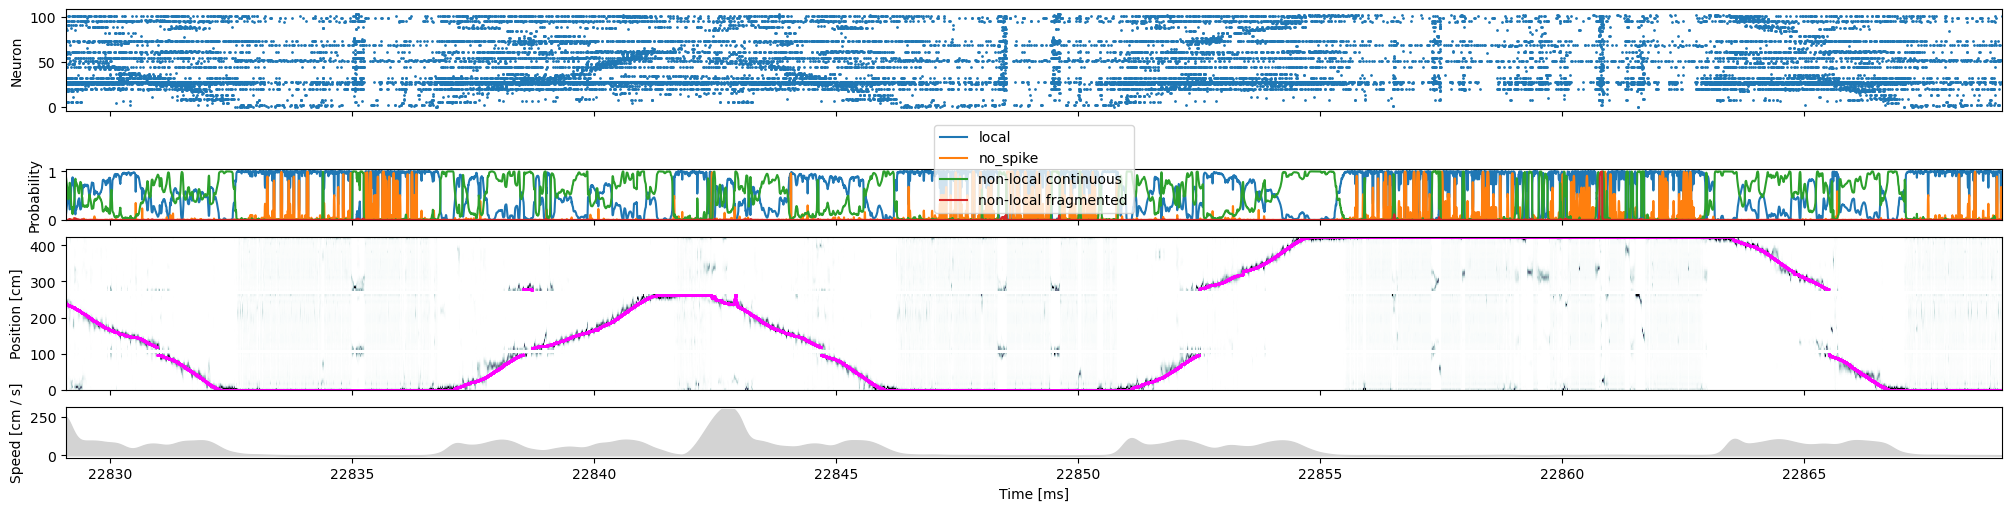

In [13]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(220_000, 240_000),
)


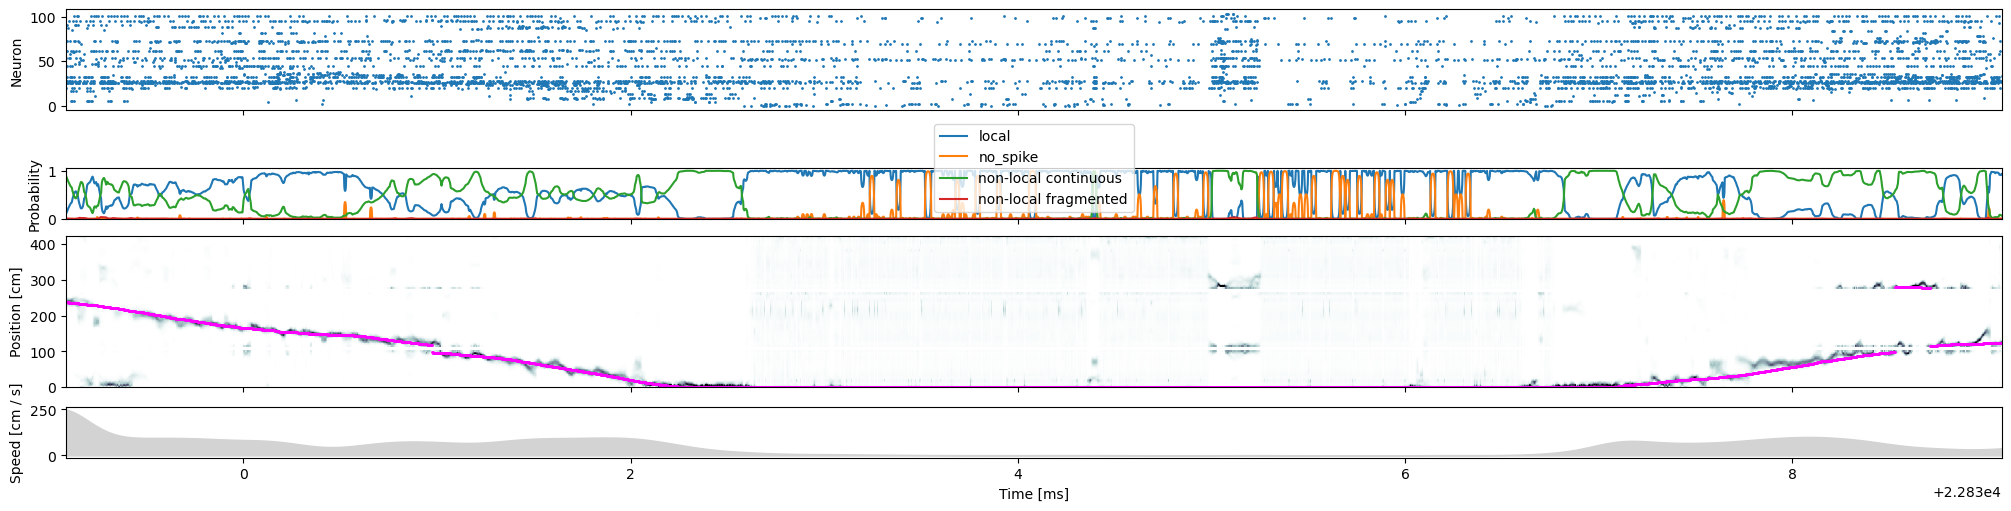

In [14]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(220_000, 225_000),
)


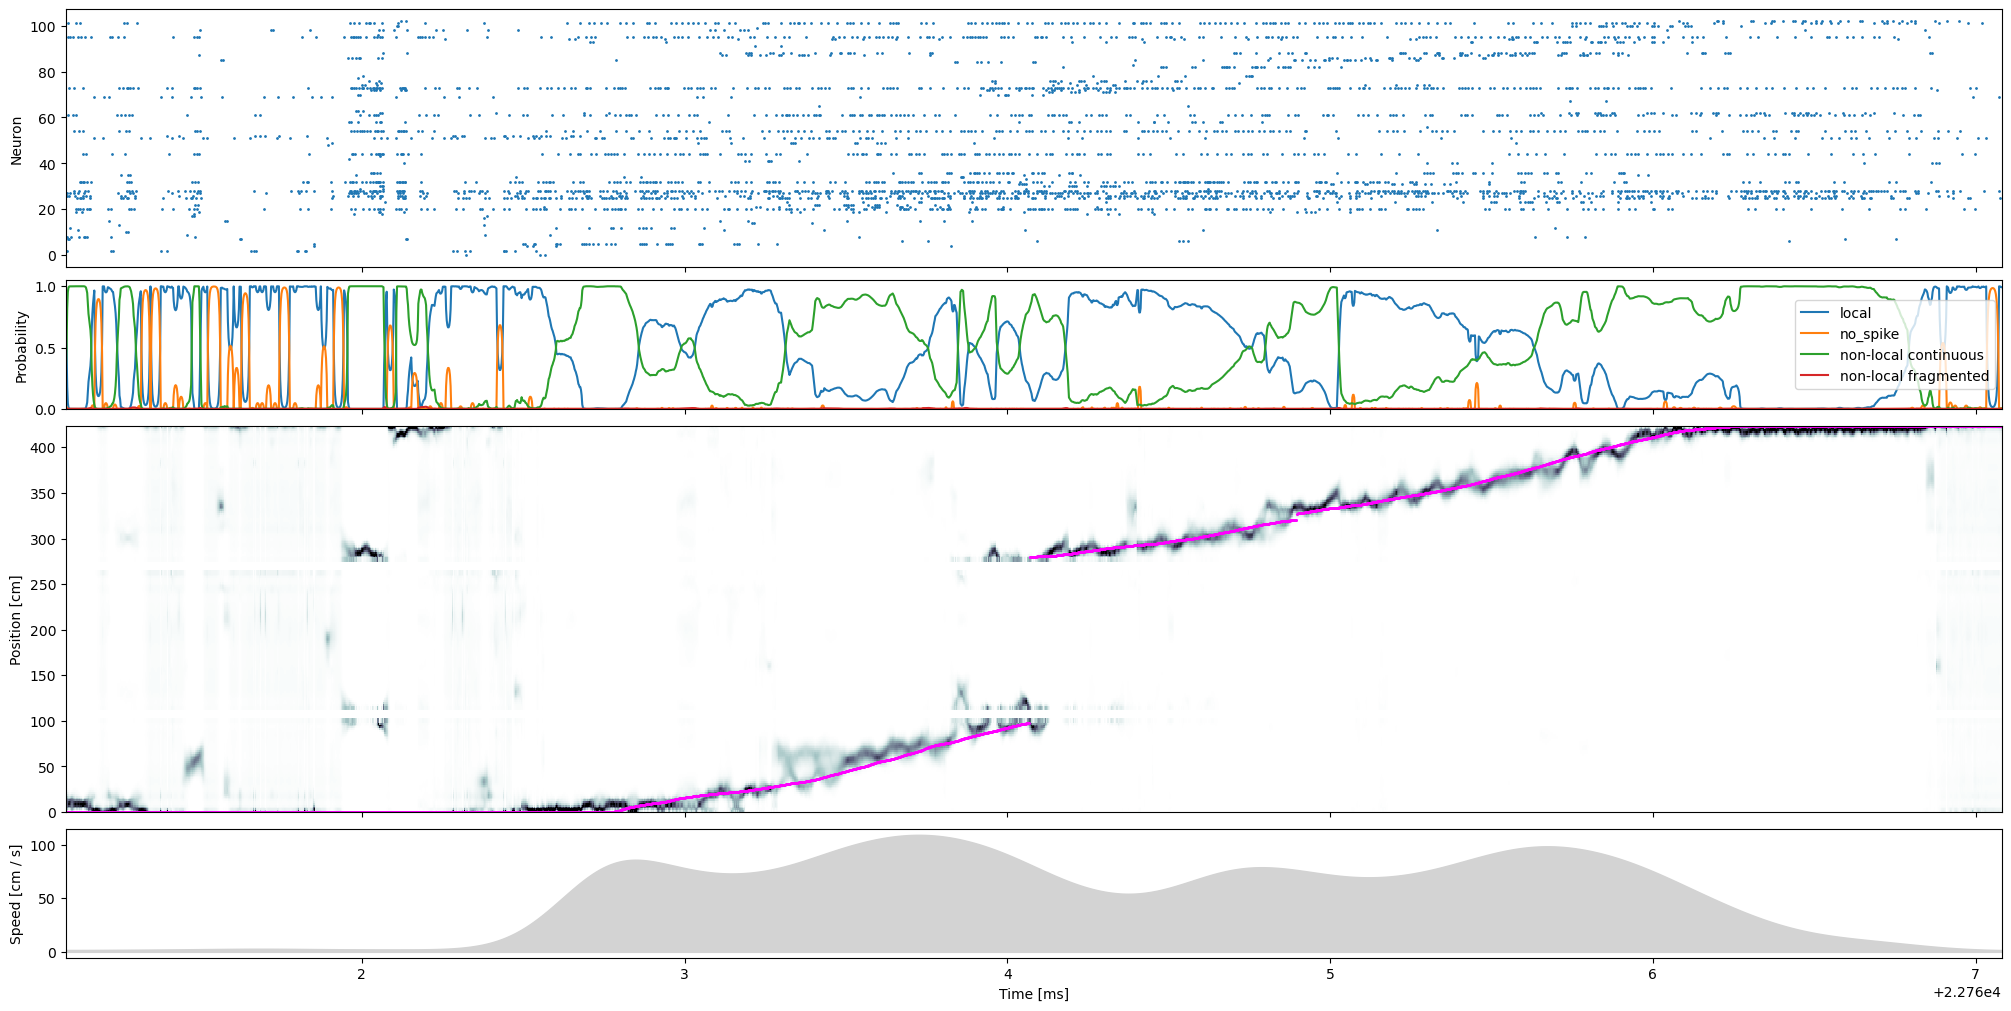

In [15]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(186_000, 189_000),
    figsize=(20, 10),
)


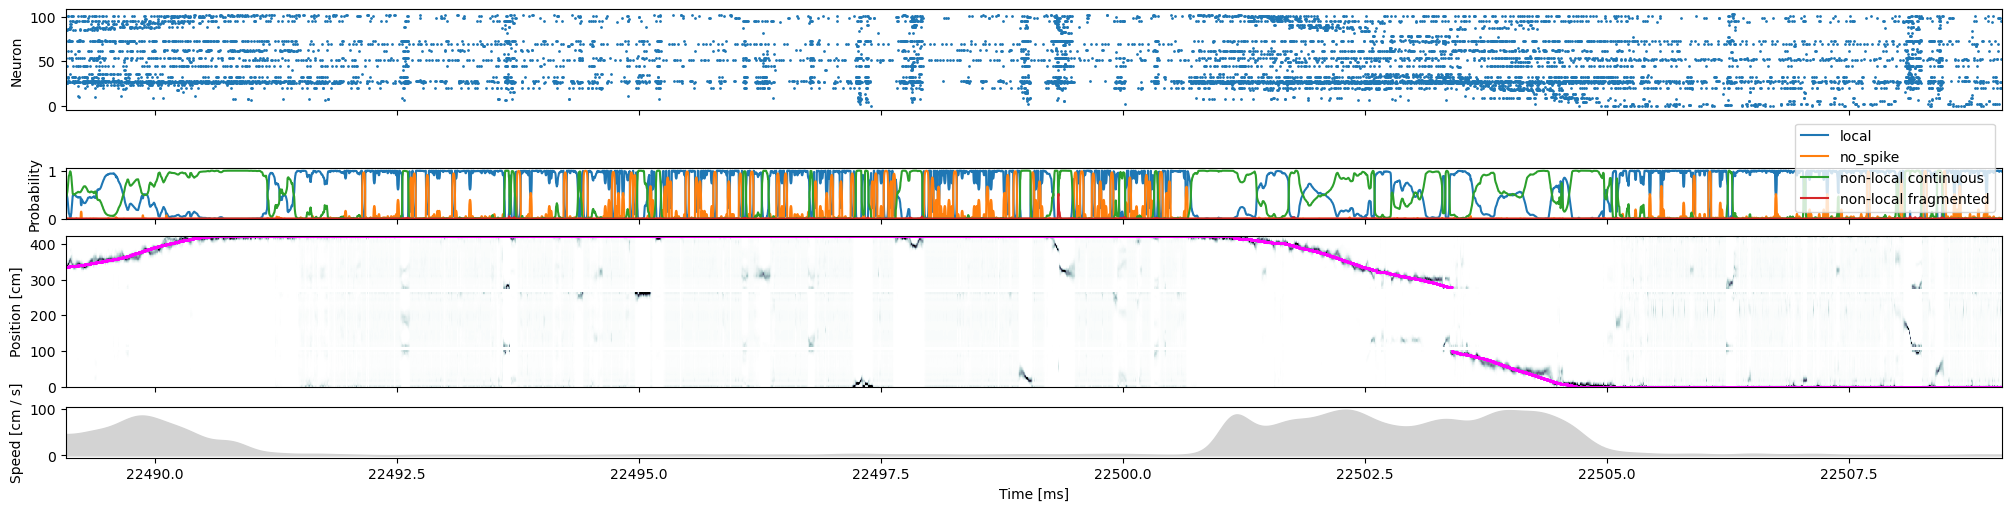

In [16]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(50_000, 60_000),
)


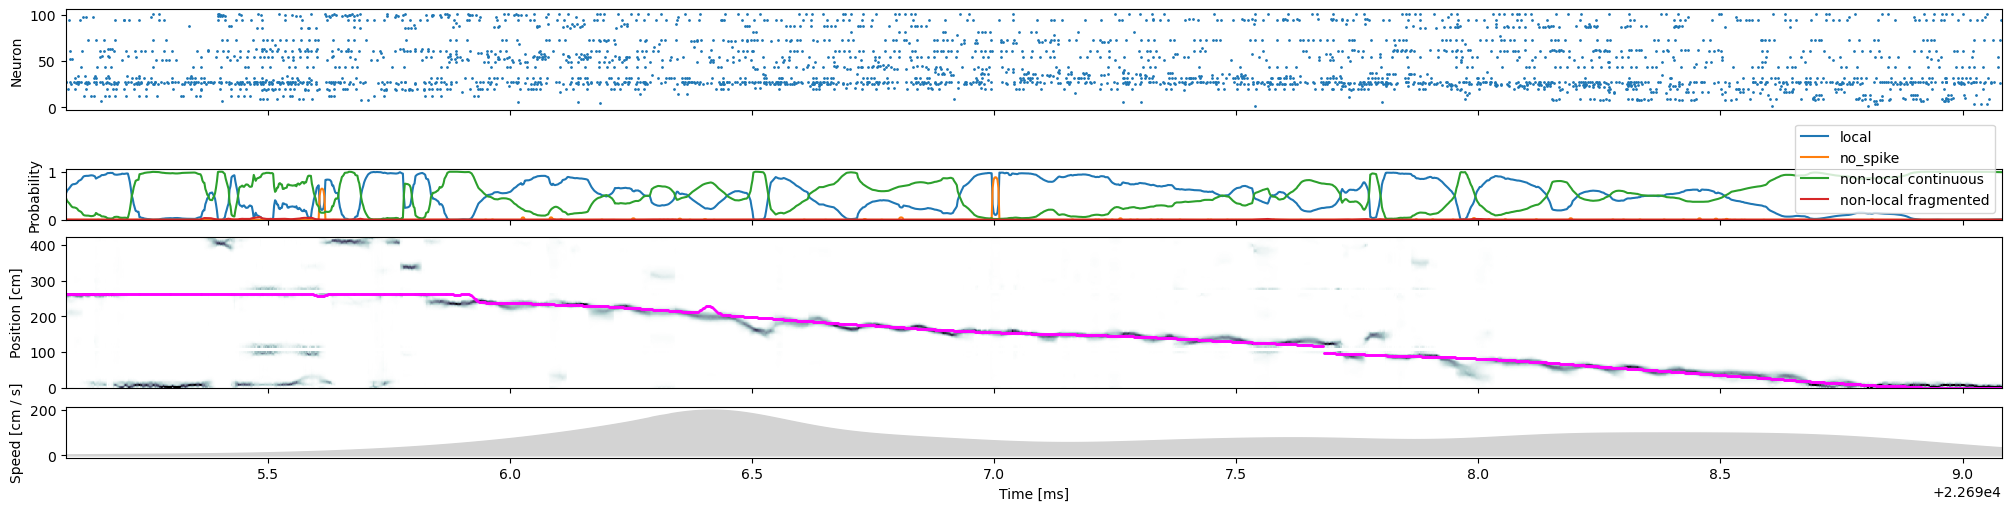

In [17]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(153_000, 155_000),
)


Text(0.5, 1.0, 'Discrete State Transition')

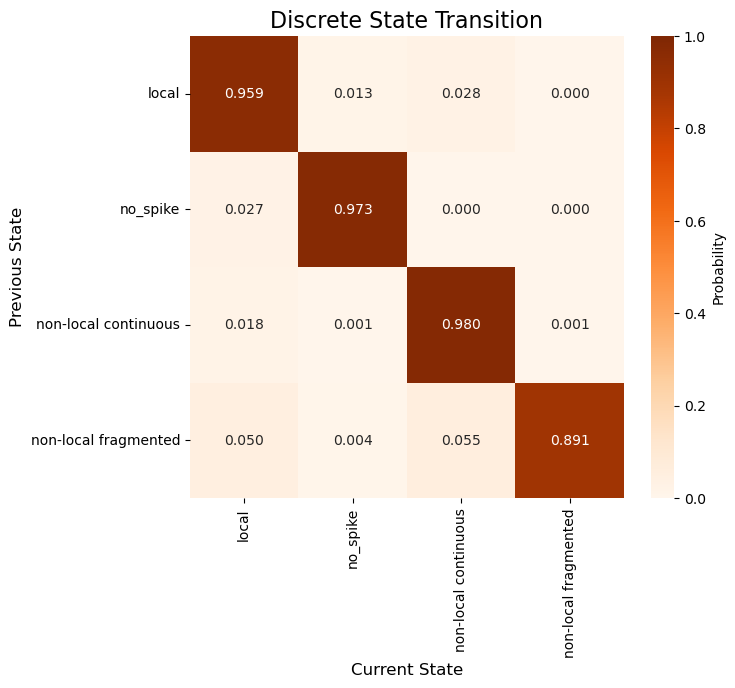

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

vmin, vmax, fmt = 0.0, 1.0, "0.03f"
label = "Probability"
cmap = "Oranges"

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(
    data=discrete_state_transitions,
    vmin=vmin,
    vmax=vmax,
    annot=True,
    fmt=fmt,
    cmap=cmap,
    xticklabels=state_names,
    yticklabels=state_names,
    ax=ax,
    cbar_kws={"label": label},
)
ax.set_ylabel("Previous State", fontsize=12)
ax.set_xlabel("Current State", fontsize=12)
ax.set_title("Discrete State Transition", fontsize=16)